In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
dfo_md = pd.read_csv("/Users/Diana/Documents/escuela/phd/bb_data/bbmp_aggregated_profiles.csv")
bb_md = pd.read_csv("/Users/Diana/Documents/escuela/phd/bb_data/2019/METADATA_2.tsv", sep='\t')

In [3]:
#restrict to only years of interest 2019
dfo_md_19 = dfo_md[dfo_md.year_time == 2019]
dfo_md_19.loc[:,'year'] = "BB19" #add this column to match with metadata for QIIME2

/Users/Diana/miniconda3/envs/qiime2-2020.111/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/Diana/miniconda3/envs/qiime2-2020.111/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [4]:
dfo_19 = dfo_md_19.copy()

In [5]:
#restrict to only pressures 1,5,10,60
dfo_pressure_1 = dfo_19[dfo_19.pressure == 1.0]
dfo_pressure_1.loc[:,'depth_code'] = "A"

dfo_pressure_5 = dfo_19[dfo_19.pressure == 5.0]
dfo_pressure_5.loc[:,'depth_code'] = "B"

dfo_pressure_10 = dfo_19[dfo_19.pressure == 10.0]
dfo_pressure_10.loc[:,'depth_code'] = "C"

dfo_pressure_60 = dfo_19[dfo_19.pressure == 60.0]
dfo_pressure_60.loc[:,'depth_code'] = "D"

/Users/Diana/miniconda3/envs/qiime2-2020.111/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/Diana/miniconda3/envs/qiime2-2020.111/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/Diana/miniconda3/envs/qiime2-2020.111/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [6]:
dfo_19 = pd.concat([dfo_pressure_1,dfo_pressure_5,dfo_pressure_10,dfo_pressure_60])

In [7]:
dfo_19 = dfo_19.sort_values(by="time_string")
dfo_19

,time_string,year_time,month_time,day_time,julian_day,scan,pressure,temperature,conductivity,oxygenVoltage,...,unknown2,altimeter,sigmaTheta2,VOLT,depth,fluorometer,par,flagArchaic,year,depth_code
145817,2019-01-09 13:15:32,2019,1,9,9,1465.0,1.0,2.1872,0.620812,3.3261,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,A
145935,2019-01-09 13:15:32,2019,1,9,9,3610.0,60.0,4.9685,0.708055,2.2244,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,D
145825,2019-01-09 13:15:32,2019,1,9,9,2302.0,5.0,2.1256,0.618173,3.3468,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,B
145835,2019-01-09 13:15:32,2019,1,9,9,2406.0,10.0,2.1674,0.619469,3.3406,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,C
146069,2019-01-17 13:27:39,2019,1,17,17,3559.0,60.0,4.9261,0.707437,2.0030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152327,2019-12-11 13:27:25,2019,12,11,345,2644.0,1.0,6.8510,0.630559,3.0562,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,A
152472,2019-12-18 13:01:34,2019,12,18,352,2570.0,5.0,6.2018,0.672735,2.4033,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,B
152464,2019-12-18 13:01:34,2019,12,18,352,2472.0,1.0,4.3977,0.608703,2.4235,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,A
152482,2019-12-18 13:01:34,2019,12,18,352,2675.0,10.0,6.9927,0.709274,2.2938,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,C


In [8]:
dfo_19.shape

(199, 34)

In [9]:
dfo_19 = dfo_19.reset_index()

In [10]:
dfo_19.loc[dfo_19['month_time'] == 2]

,index,time_string,year_time,month_time,day_time,julian_day,scan,pressure,temperature,conductivity,...,unknown2,altimeter,sigmaTheta2,VOLT,depth,fluorometer,par,flagArchaic,year,depth_code
16,146368,2019-02-06 13:19:04,2019,2,6,37,2621.0,5.0,1.9352,0.620368,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,B
17,146478,2019-02-06 13:19:04,2019,2,6,37,3515.0,60.0,4.9195,0.705999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,D
18,146360,2019-02-06 13:19:04,2019,2,6,37,2525.0,1.0,1.9152,0.619204,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,A
19,146378,2019-02-06 13:19:04,2019,2,6,37,2700.0,10.0,1.9629,0.625336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,C
20,146514,2019-02-14 13:20:48,2019,2,14,45,3052.0,10.0,1.3398,0.618472,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,C
21,146614,2019-02-14 13:20:48,2019,2,14,45,3853.0,60.0,2.8491,0.663177,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,D
22,146504,2019-02-14 13:20:48,2019,2,14,45,2965.0,5.0,1.3045,0.617243,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,B
23,146496,2019-02-14 13:20:48,2019,2,14,45,2908.0,1.0,0.8288,0.599134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,A
24,146642,2019-02-20 13:22:19,2019,2,20,51,2532.0,5.0,1.1553,0.615689,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,B
25,146652,2019-02-20 13:22:19,2019,2,20,51,2616.0,10.0,1.4078,0.622687,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,C


In [11]:
dfo_19.columns

Index(['index', 'time_string', 'year_time', 'month_time', 'day_time',
       'julian_day', 'scan', 'pressure', 'temperature', 'conductivity',
       'oxygenVoltage', 'fluorescence', 'unknown', 'pH', 'PSAR', 'salinity',
       'theta', 'sigmaTheta', 'oxygen', 'scan2', 'fluorescence2', 'turbidity',
       'oxygenCurrent', 'oxygenTemperature', 'oxygenSaturation', 'unknown2',
       'altimeter', 'sigmaTheta2', 'VOLT', 'depth', 'fluorometer', 'par',
       'flagArchaic', 'year', 'depth_code'],
      dtype='object')

In [12]:
dfo_19.loc[26.5] = 'Nan', 'Nan', 2019, 2, 20, 51, 'Nan', 60.0, 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan','Nan', 'Nan', 'Nan', 'Nan', 'Nan','Nan', 'Nan', 'Nan', 'Nan', 'Nan','Nan', 'Nan', 'Nan', 'Nan', 'Nan','BB19', 'D' #insert a column for the missing sample

In [13]:
dfo_19 = dfo_19.sort_index().reset_index(drop=True)

In [14]:
#add week number
week = np.arange(2,52)
week = np.repeat(week, 4)

In [15]:
dfo_19['week'] = week

In [16]:
#how to join them:

#We'll make a new list to be our new column.
new_labels = []

#we can iterate through rows with this.
for _, row in dfo_19.iterrows():
    #we can get the column value of each row by indexing on the column name
    year = row['year']
    depth_code = row['depth_code']
    week = row['week']
    #we use string formatting here to make a new label
    new_label = "{0}-{1}{2}".format(year, week, depth_code)
    #add the new label to the list
    new_labels.append(new_label)
#this will make a new column in the df called 'NewLabel' with the values
dfo_19['name'] = new_labels
dfo_19

,index,time_string,year_time,month_time,day_time,julian_day,scan,pressure,temperature,conductivity,...,sigmaTheta2,VOLT,depth,fluorometer,par,flagArchaic,year,depth_code,week,name
0,145817,2019-01-09 13:15:32,2019,1,9,9,1465,1.0,2.1872,0.620812,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,A,2,BB19-2A
1,145935,2019-01-09 13:15:32,2019,1,9,9,3610,60.0,4.9685,0.708055,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,D,2,BB19-2D
2,145825,2019-01-09 13:15:32,2019,1,9,9,2302,5.0,2.1256,0.618173,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,B,2,BB19-2B
3,145835,2019-01-09 13:15:32,2019,1,9,9,2406,10.0,2.1674,0.619469,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,C,2,BB19-2C
4,146069,2019-01-17 13:27:39,2019,1,17,17,3559,60.0,4.9261,0.707437,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,D,3,BB19-3D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,152327,2019-12-11 13:27:25,2019,12,11,345,2644,1.0,6.851,0.630559,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,A,50,BB19-50A
196,152472,2019-12-18 13:01:34,2019,12,18,352,2570,5.0,6.2018,0.672735,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,B,51,BB19-51B
197,152464,2019-12-18 13:01:34,2019,12,18,352,2472,1.0,4.3977,0.608703,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,A,51,BB19-51A
198,152482,2019-12-18 13:01:34,2019,12,18,352,2675,10.0,6.9927,0.709274,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,C,51,BB19-51C


In [17]:
#how to join them:

#We'll make a new list to be our new column.
new_labels = []

#we can iterate through rows with this.
for _, row in bb_md.iterrows():
    #we can get the column value of each row by indexing on the column name
    depth_code = row['Depth code']
    week = row['Week #']
    #we use string formatting here to make a new label
    new_label = "BB19-{1}{2}".format(year, week, depth_code)
    #add the new label to the list
    new_labels.append(new_label)
#this will make a new column in the df called 'NewLabel' with the values
bb_md['name'] = new_labels
bb_md

,sampleid,Year,Date,Week #,Correct Week #,Depth(m),Depth code,Size Code\n0.2um - S\n3um - L,Tube Label\nBBYear.WeekDepthSize,Extraction Date,...,Notes,Season,Disturbance,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,name
0,BB19-2AL,2019,09-Jan,2,2,1,A,L,BB19-2AL,JAN 18 2022,...,NaN,Winter,Pre,NaN,NaN,NaN,NaN,NaN,NaN,BB19-2A
1,BB19-2AS,2019,09-Jan,2,2,1,A,S,BB19-2AS,JAN 18 2022,...,NaN,Winter,Pre,NaN,NaN,NaN,NaN,NaN,NaN,BB19-2A
2,BB19-2BL,2019,09-Jan,2,2,5,B,L,BB19-2BL,JAN 18 2022,...,NaN,Winter,Pre,NaN,NaN,NaN,NaN,NaN,NaN,BB19-2B
3,BB19-2BS,2019,09-Jan,2,2,5,B,S,BB19-2BS,JAN 18 2022,...,NaN,Winter,Pre,NaN,NaN,NaN,NaN,NaN,NaN,BB19-2B
4,BB19-2CL,2019,09-Jan,2,2,10,C,L,BB19-2CL,JAN 18 2022,...,NaN,Winter,Pre,NaN,NaN,NaN,NaN,NaN,NaN,BB19-2C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,BB19-51BS,2019,18-Dec,51,51,5,B,S,BB19-DEC18 BS,Dec 14 2021,...,NaN,Fall,Post,NaN,NaN,NaN,NaN,NaN,NaN,BB19-51B
398,BB19-51CL,2019,18-Dec,51,51,10,C,L,BB19-DEC18 CL,Dec 14 2021,...,NaN,Fall,Post,NaN,NaN,NaN,NaN,NaN,NaN,BB19-51C
399,BB19-51CS,2019,18-Dec,51,51,10,C,S,BB19-DEC18 CS,Dec 14 2021,...,NaN,Fall,Post,NaN,NaN,NaN,NaN,NaN,NaN,BB19-51C
400,BB19-51DL,2019,18-Dec,51,51,60,D,L,BB19-DEC18 DL,Dec 14 2021,...,NaN,Fall,Post,NaN,NaN,NaN,NaN,NaN,NaN,BB19-51D


In [18]:
#merge 2 metadata files
metadata_bb = pd.merge(bb_md, dfo_19, on = 'name',how='outer')
metadata_bb

,sampleid,Year,Date,Week #,Correct Week #,Depth(m),Depth code,Size Code\n0.2um - S\n3um - L,Tube Label\nBBYear.WeekDepthSize,Extraction Date,...,altimeter,sigmaTheta2,VOLT,depth,fluorometer,par,flagArchaic,year,depth_code,week
0,BB19-2AL,2019.0,09-Jan,2.0,2.0,1.0,A,L,BB19-2AL,JAN 18 2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,A,2.0
1,BB19-2AS,2019.0,09-Jan,2.0,2.0,1.0,A,S,BB19-2AS,JAN 18 2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,A,2.0
2,BB19-2BL,2019.0,09-Jan,2.0,2.0,5.0,B,L,BB19-2BL,JAN 18 2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,B,2.0
3,BB19-2BS,2019.0,09-Jan,2.0,2.0,5.0,B,S,BB19-2BS,JAN 18 2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,B,2.0
4,BB19-2CL,2019.0,09-Jan,2.0,2.0,10.0,C,L,BB19-2CL,JAN 18 2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,BB19-51DS,2019.0,18-Dec,51.0,51.0,60.0,D,S,BB19-DEC18 DS,Dec 14 2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,D,51.0
402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,A,43.0
403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,D,43.0
404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,B,43.0


In [20]:
dfo_19.to_csv('dfo_metadata_y19.csv', index=False)

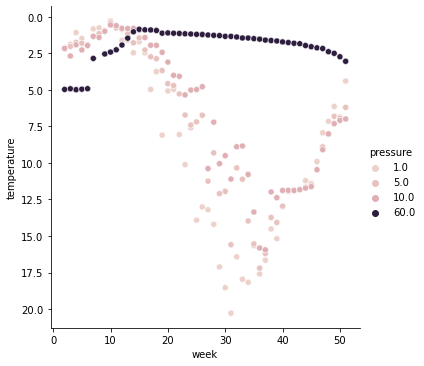

In [19]:
sns.relplot(data=metadata_bb, x="week", y="temperature", hue='pressure')

In [67]:
metadata_bb2 = metadata_bb.fillna(0)

In [62]:
metadata_bb2["week"] = pd.to_numeric(metadata_bb2["week"])

In [71]:
print (metadata_bb2[pd.to_numeric(metadata_bb2.temperature, errors='coerce').isnull()])

    sampleid    Year    Date  Week #  Correct Week #  Depth(m) Depth code  \
54  BB19-8DL  2019.0  20-Feb     8.0             8.0      60.0          D   
55  BB19-8DS  2019.0  20-Feb     8.0             8.0      60.0          D   

   Size Code\n0.2um - S\n3um - L Tube Label\nBBYear.WeekDepthSize  \
54                             L                         BB19-8DL   
55                             S                         BB19-8DS   

   Extraction Date  ... altimeter  sigmaTheta2 VOLT  depth  fluorometer  par  \
54     AUG 18 2043  ...       Nan          Nan  Nan    Nan          Nan  Nan   
55     AUG 18 2044  ...       Nan          Nan  Nan    Nan          Nan  Nan   

    flagArchaic  year depth_code week  
54          Nan  BB19          D  8.0  
55          Nan  BB19          D  8.0  

[2 rows x 66 columns]


In [69]:
metadata_bb2["temperature"] = pd.to_numeric(metadata_bb2["temperature"])

ValueError: Unable to parse string "Nan" at position 54

DataError: No numeric types to aggregate

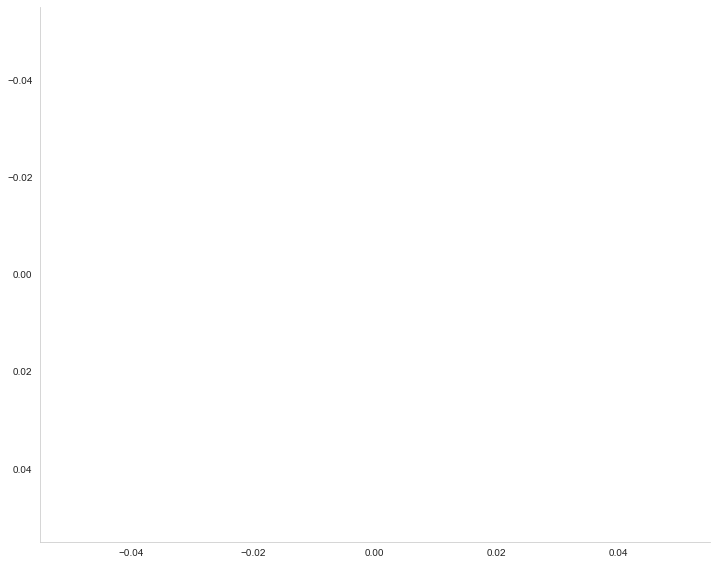

In [70]:
sns.set_style("whitegrid", {'axes.grid' : False})
g = sns.relplot(
    data=metadata_bb2, kind="line",
    x="week", y="temperature", hue="pressure", height = 8, aspect = 1.25
)
g.set(xticks=np.arange(0,52,5))
plt.axvline(36, ls='--')

In [22]:
metadata_bb

,sampleid,Year,Date,Week #,Correct Week #,Depth(m),Depth code,Size Code\n0.2um - S\n3um - L,Tube Label\nBBYear.WeekDepthSize,Extraction Date,...,altimeter,sigmaTheta2,VOLT,depth,fluorometer,par,flagArchaic,year,depth_code,week
0,BB19-2AL,2019.0,09-Jan,2.0,2.0,1.0,A,L,BB19-2AL,JAN 18 2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,A,2.0
1,BB19-2AS,2019.0,09-Jan,2.0,2.0,1.0,A,S,BB19-2AS,JAN 18 2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,A,2.0
2,BB19-2BL,2019.0,09-Jan,2.0,2.0,5.0,B,L,BB19-2BL,JAN 18 2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,B,2.0
3,BB19-2BS,2019.0,09-Jan,2.0,2.0,5.0,B,S,BB19-2BS,JAN 18 2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,B,2.0
4,BB19-2CL,2019.0,09-Jan,2.0,2.0,10.0,C,L,BB19-2CL,JAN 18 2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,BB19-51DS,2019.0,18-Dec,51.0,51.0,60.0,D,S,BB19-DEC18 DS,Dec 14 2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,D,51.0
402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,A,43.0
403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,D,43.0
404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,B,43.0


In [23]:
biomtable = pd.read_csv("/Users/Diana/Documents/escuela/phd/bb_data/2019/dada2_output_270210_exported/table_from_biom.txt", sep='\t')
classification = pd.read_csv("/Users/Diana/Documents/escuela/phd/bb_data/2019/taxa_270210/taxonomy.tsv", sep='\t')

In [24]:
biomtable.rename({'#OTU ID': 'Feature ID'}, axis=1, inplace=True)

In [25]:
biomtable

,Feature ID,BB19-18AL,BB19-18AS,BB19-18BL,BB19-18BS,BB19-18CL,BB19-18CS,BB19-18DL,BB19-18DS,BB19-19AL,...,BB19-a42DL,BB19-a42DS,BB19-a43AL,BB19-a43AS,BB19-a43BL,BB19-a43BS,BB19-a43CL,BB19-a43CS,BB19-a43DL,BB19-a43DS
0,88504ccccf908bd07cad252b49564924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13619828c878447a5e2bc1cf8b804d6b,18.0,33.0,27.0,104.0,12.0,52.0,0.0,38.0,0.0,...,7.0,4.0,8.0,105.0,24.0,590.0,0.0,0.0,5.0,52.0
2,3e8b0a1f4a6f4ac548d2555baf3ba224,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6960eba3db7d4d863d042ab497d7481a,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,cfd6f30b60229b82d961466eecf6b6cc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,9.0,0.0,39.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2565,24307b207be4a1535c53be33874e2144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2566,250a576e3788b3f444938c7b08afb2e3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2567,c37ef8da1b8a054f668c70b4a37e79ec,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2568,9a42b1a99282a492b2b01a47f5dd21c4,14.0,9.0,42.0,44.0,16.0,17.0,15.0,15.0,666.0,...,249.0,222.0,0.0,0.0,0.0,0.0,0.0,0.0,501.0,0.0


In [26]:
meltedbiom = pd.melt(frame=biomtable, id_vars = 'Feature ID', var_name = 'sampleid', value_name = 'Rel Abun')

In [27]:
mergedmelty = pd.merge(meltedbiom, classification, on = 'Feature ID',how='inner')

In [28]:
merged = mergedmelty.set_index('Taxon')

In [29]:
merged = merged.drop(columns=['Confidence', 'Feature ID'])

In [30]:
merged

,sampleid,Rel Abun
Taxon,,
d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Legionellales; f__Legionellaceae; g__Legionella; s__uncultured_Legionellaceae,BB19-18AL,0.0
d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Legionellales; f__Legionellaceae; g__Legionella; s__uncultured_Legionellaceae,BB19-18AS,0.0
d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Legionellales; f__Legionellaceae; g__Legionella; s__uncultured_Legionellaceae,BB19-18BL,0.0
d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Legionellales; f__Legionellaceae; g__Legionella; s__uncultured_Legionellaceae,BB19-18BS,0.0
d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Legionellales; f__Legionellaceae; g__Legionella; s__uncultured_Legionellaceae,BB19-18CL,0.0
...,...,...
d__Bacteria; p__Desulfobacterota; c__Desulfuromonadia; o__Bradymonadales; f__Bradymonadales; g__Bradymonadales; s__uncultured_marine,BB19-a43BS,0.0
d__Bacteria; p__Desulfobacterota; c__Desulfuromonadia; o__Bradymonadales; f__Bradymonadales; g__Bradymonadales; s__uncultured_marine,BB19-a43CL,0.0
d__Bacteria; p__Desulfobacterota; c__Desulfuromonadia; o__Bradymonadales; f__Bradymonadales; g__Bradymonadales; s__uncultured_marine,BB19-a43CS,0.0


In [31]:
merged.loc[:,'Total'] = merged.sum(axis=1)
merged

,sampleid,Rel Abun,Total
Taxon,,,
d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Legionellales; f__Legionellaceae; g__Legionella; s__uncultured_Legionellaceae,BB19-18AL,0.0,0.0
d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Legionellales; f__Legionellaceae; g__Legionella; s__uncultured_Legionellaceae,BB19-18AS,0.0,0.0
d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Legionellales; f__Legionellaceae; g__Legionella; s__uncultured_Legionellaceae,BB19-18BL,0.0,0.0
d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Legionellales; f__Legionellaceae; g__Legionella; s__uncultured_Legionellaceae,BB19-18BS,0.0,0.0
d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Legionellales; f__Legionellaceae; g__Legionella; s__uncultured_Legionellaceae,BB19-18CL,0.0,0.0
...,...,...,...
d__Bacteria; p__Desulfobacterota; c__Desulfuromonadia; o__Bradymonadales; f__Bradymonadales; g__Bradymonadales; s__uncultured_marine,BB19-a43BS,0.0,0.0
d__Bacteria; p__Desulfobacterota; c__Desulfuromonadia; o__Bradymonadales; f__Bradymonadales; g__Bradymonadales; s__uncultured_marine,BB19-a43CL,0.0,0.0
d__Bacteria; p__Desulfobacterota; c__Desulfuromonadia; o__Bradymonadales; f__Bradymonadales; g__Bradymonadales; s__uncultured_marine,BB19-a43CS,0.0,0.0


In [32]:
groupedbytaxon = merged.groupby(['Taxon']).sum()

In [33]:
groupformelty = groupedbytaxon.reset_index()

In [34]:
totals = groupformelty[['Taxon', 'Total']]

In [35]:
top20 = groupedbytaxon.nlargest(20,'Total')

In [36]:
top5 = groupedbytaxon.nlargest(5, 'Total')

In [37]:
rare5 =  groupedbytaxon.nsmallest(5, 'Total')

In [38]:
rare5.index

Index(['d__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Chitinophagales; f__uncultured; g__uncultured; s__uncultured_delta',
       'd__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Cytophagales; f__Cyclobacteriaceae; g__Fulvivirga; s__uncultured_Flexibacter',
       'd__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Cytophagales; f__Spirosomaceae; g__Arcicella',
       'd__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Flavobacteriales; f__Crocinitomicaceae; g__uncultured; s__uncultured_Bacteroidetes',
       'd__Bacteria; p__Desulfobacterota; c__Desulfuromonadia; o__Desulfuromonadia; f__Geopsychrobacteraceae; g__Desulfuromusa; s__uncultured_bacterium'],
      dtype='object', name='Taxon')

In [39]:
top20 = top20.drop(columns=['Total'])

In [40]:
top20T = top20.T
top20T['sampleid'] = top20T.index

In [41]:
top20T.columns

Index(['d__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Chitinophagales; f__Saprospiraceae; g__Lewinella; s__uncultured_marine',
       'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhodobacterales; f__Rhodobacteraceae; g__Planktomarina',
       'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Oceanospirillales; f__Nitrincolaceae; g__uncultured; s__uncultured_marine',
       'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__SAR11_clade; f__Clade_I; g__Clade_Ia',
       'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Thiomicrospirales; f__Thioglobaceae',
       'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhodobacterales; f__Rhodobacteraceae; g__Amylibacter',
       'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhodobacterales; f__Rhodobacteraceae',
       'd__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Flavobacteriales; f__Crocinitomicaceae; g__Fluviicola',
       'd__Bacteria; p__Bacteroidota; c__Bacteroidi

In [42]:
df_long.pivot_table(index=["sampleid"], 
                    columns='class', 
                    values='grade')

NameError: name 'df_long' is not defined

In [43]:
df_long.pivot_table(index=["student", "school"], 
                    columns='class', 
                    values='grade')

NameError: name 'df_long' is not defined

In [44]:
withmeta = pd.merge(top20T, metadata_bb, on = 'sampleid',how='inner')

In [45]:
withmetamelty = pd.merge(mergedmelty, metadata_bb, on='sampleid', how='inner')

In [46]:
withmetamelty = pd.merge (withmetamelty, totals, on = 'Taxon', how='inner')

In [47]:
withmetamelty

,Feature ID,sampleid,Rel Abun,Taxon,Confidence,Year,Date,Week #,Correct Week #,Depth(m),...,sigmaTheta2,VOLT,depth,fluorometer,par,flagArchaic,year,depth_code,week,Total
0,88504ccccf908bd07cad252b49564924,BB19-18AL,0.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.939373,2019.0,01-May,18.0,18.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,A,18.0,159.0
1,88504ccccf908bd07cad252b49564924,BB19-18AS,0.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.939373,2019.0,01-May,18.0,18.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,A,18.0,159.0
2,88504ccccf908bd07cad252b49564924,BB19-18BL,0.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.939373,2019.0,01-May,18.0,18.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,B,18.0,159.0
3,88504ccccf908bd07cad252b49564924,BB19-18BS,0.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.939373,2019.0,01-May,18.0,18.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,B,18.0,159.0
4,88504ccccf908bd07cad252b49564924,BB19-18CL,0.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.939373,2019.0,01-May,18.0,18.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,C,18.0,159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701605,250a576e3788b3f444938c7b08afb2e3,BB19-a43BS,0.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.723322,2019.0,23-Oct,42.0,43.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,B,42.0,194.0
701606,250a576e3788b3f444938c7b08afb2e3,BB19-a43CL,0.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.723322,2019.0,23-Oct,42.0,43.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,C,42.0,194.0
701607,250a576e3788b3f444938c7b08afb2e3,BB19-a43CS,0.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.723322,2019.0,23-Oct,42.0,43.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,C,42.0,194.0
701608,250a576e3788b3f444938c7b08afb2e3,BB19-a43DL,0.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.723322,2019.0,23-Oct,42.0,43.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,D,42.0,194.0


In [48]:
top20 = ['d__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Chitinophagales; f__Saprospiraceae; g__Lewinella; s__uncultured_marine',
       'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhodobacterales; f__Rhodobacteraceae; g__Planktomarina',
       'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Oceanospirillales; f__Nitrincolaceae; g__uncultured; s__uncultured_marine',
       'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__SAR11_clade; f__Clade_I; g__Clade_Ia',
       'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Thiomicrospirales; f__Thioglobaceae',
       'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhodobacterales; f__Rhodobacteraceae; g__Amylibacter',
       'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhodobacterales; f__Rhodobacteraceae',
       'd__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Flavobacteriales; f__Crocinitomicaceae; g__Fluviicola',
       'd__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Flavobacteriales; f__Flavobacteriaceae; g__uncultured; s__uncultured_marine',
       'd__Bacteria; p__Planctomycetota; c__OM190; o__OM190; f__OM190; g__OM190; s__marine_metagenome',
       'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Thiomicrospirales; f__Thioglobaceae; g__SUP05_cluster',
       'd__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Flavobacteriales; f__Cryomorphaceae; g__uncultured',
       'd__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Flavobacteriales; f__Flavobacteriaceae',
       'd__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Flavobacteriales; f__Flavobacteriaceae; g__Tenacibaculum',
       'd__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Flavobacteriales; f__Flavobacteriaceae; g__Ulvibacter; s__uncultured_marine',
       'd__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Flavobacteriales; f__Flavobacteriaceae; g__NS5_marine_group',
       'd__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Flavobacteriales; f__Flavobacteriaceae; g__Polaribacter',
       'd__Bacteria; p__Nitrospinota; c__Nitrospinia; o__Nitrospinales; f__Nitrospinaceae; g__LS-NOB',
       'd__Bacteria; p__Planctomycetota; c__Planctomycetes; o__Planctomycetales; f__Rubinisphaeraceae; g__Fuerstia; s__uncultured_bacterium',
       'd__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Flavobacteriales; f__Flavobacteriaceae; g__NS3a_marine_group']


In [49]:
top5 = ['d__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Chitinophagales; f__Saprospiraceae; g__Lewinella; s__uncultured_marine',
       'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhodobacterales; f__Rhodobacteraceae; g__Planktomarina',
       'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Oceanospirillales; f__Nitrincolaceae; g__uncultured; s__uncultured_marine',
       'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__SAR11_clade; f__Clade_I; g__Clade_Ia',
       'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Thiomicrospirales; f__Thioglobaceae']

In [50]:
mdtop20 = withmetamelty[withmetamelty['Taxon'].isin(top20)]

In [51]:
mdtop5 = withmetamelty[withmetamelty['Taxon'].isin(top5)]

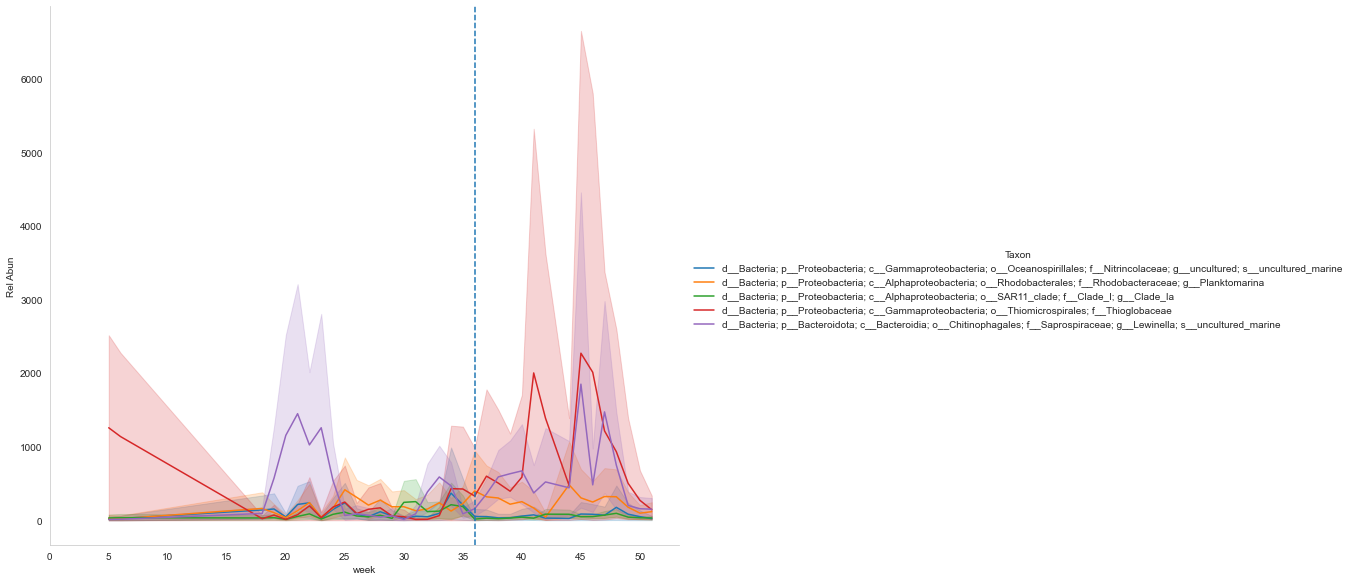

In [52]:
sns.set_style("whitegrid", {'axes.grid' : False})
g = sns.relplot(
    data=mdtop5, kind="line",
    x="week", y="Rel Abun", hue="Taxon", height = 8, aspect = 1.25
)
g.set(xticks=np.arange(0,52,5))
plt.axvline(36, ls='--')

In [53]:
mdtop5

,Feature ID,sampleid,Rel Abun,Taxon,Confidence,Year,Date,Week #,Correct Week #,Depth(m),...,sigmaTheta2,VOLT,depth,fluorometer,par,flagArchaic,year,depth_code,week,Total
169260,8de78294559168d41a2f0ec6196bff4f,BB19-18AL,73.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.704028,2019.0,01-May,18.0,18.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,A,18.0,312112.0
169261,2462a5acc546029c7e21fd170d2a482e,BB19-18AL,0.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.771751,2019.0,01-May,18.0,18.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,A,18.0,312112.0
169262,51d6f4fcbee32cc1382a4e8a147f384e,BB19-18AL,0.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.729820,2019.0,01-May,18.0,18.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,A,18.0,312112.0
169263,f752e67ebf6c52d40f99164cef71911e,BB19-18AL,0.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.787688,2019.0,01-May,18.0,18.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,A,18.0,312112.0
169264,6339c9fdaf957a8ba7073ab06e76f910,BB19-18AL,0.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.757582,2019.0,01-May,18.0,18.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,A,18.0,312112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493306,fa31e148a4fa1a4dfce3b59a2d542b85,BB19-a43DL,8.0,d__Bacteria; p__Bacteroidota; c__Bacteroidia; ...,0.735284,2019.0,23-Oct,42.0,43.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,D,42.0,400813.0
493307,71a33c961f2ca92f6ce97184fcb81f01,BB19-a43DL,914.0,d__Bacteria; p__Bacteroidota; c__Bacteroidia; ...,0.999488,2019.0,23-Oct,42.0,43.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,D,42.0,400813.0
493308,a897667502a072da9c30e63c34547778,BB19-a43DS,0.0,d__Bacteria; p__Bacteroidota; c__Bacteroidia; ...,0.980163,2019.0,23-Oct,42.0,43.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,D,42.0,400813.0
493309,fa31e148a4fa1a4dfce3b59a2d542b85,BB19-a43DS,0.0,d__Bacteria; p__Bacteroidota; c__Bacteroidia; ...,0.735284,2019.0,23-Oct,42.0,43.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,D,42.0,400813.0


In [54]:
metadata_bb

,sampleid,Year,Date,Week #,Correct Week #,Depth(m),Depth code,Size Code\n0.2um - S\n3um - L,Tube Label\nBBYear.WeekDepthSize,Extraction Date,...,altimeter,sigmaTheta2,VOLT,depth,fluorometer,par,flagArchaic,year,depth_code,week
0,BB19-2AL,2019.0,09-Jan,2.0,2.0,1.0,A,L,BB19-2AL,JAN 18 2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,A,2.0
1,BB19-2AS,2019.0,09-Jan,2.0,2.0,1.0,A,S,BB19-2AS,JAN 18 2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,A,2.0
2,BB19-2BL,2019.0,09-Jan,2.0,2.0,5.0,B,L,BB19-2BL,JAN 18 2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,B,2.0
3,BB19-2BS,2019.0,09-Jan,2.0,2.0,5.0,B,S,BB19-2BS,JAN 18 2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,B,2.0
4,BB19-2CL,2019.0,09-Jan,2.0,2.0,10.0,C,L,BB19-2CL,JAN 18 2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,BB19-51DS,2019.0,18-Dec,51.0,51.0,60.0,D,S,BB19-DEC18 DS,Dec 14 2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,D,51.0
402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,A,43.0
403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,D,43.0
404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB19,B,43.0


In [187]:
mdtop5.pressure.unique()

array([ 1.,  5., 10., 60., nan])

In [186]:
mdtop5['pressure'] = mdtop5['pressure'].replace('nan', 0.0)

/Users/Diana/miniconda3/envs/qiime2-2020.111/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [194]:
mdtop5_dA = mdtop5[mdtop5.depth_code == 'A']

In [195]:
fig = px.line(mdtop5_dA, x="week", y="Rel Abun", color='Taxon')
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show()

In [203]:
fig = px.scatter(mdtop5_dA, x="week", y="temperature", color='Season')
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show()

In [204]:
fig = px.scatter(mdtop5_dA, x="week", y="oxygen", color='Season')
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show()

In [198]:
mdtop5_dA

,Feature ID,sampleid,Rel Abun,Taxon,Confidence,Year,Date,Week #,Correct Week #,Depth(m),...,sigmaTheta2,VOLT,depth,fluorometer,par,flagArchaic,year,depth_code,week,Total
169260,8de78294559168d41a2f0ec6196bff4f,BB19-18AL,73.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.704028,2019.0,01-May,18.0,18.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,A,18.0,312112.0
169261,2462a5acc546029c7e21fd170d2a482e,BB19-18AL,0.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.771751,2019.0,01-May,18.0,18.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,A,18.0,312112.0
169262,51d6f4fcbee32cc1382a4e8a147f384e,BB19-18AL,0.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.729820,2019.0,01-May,18.0,18.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,A,18.0,312112.0
169263,f752e67ebf6c52d40f99164cef71911e,BB19-18AL,0.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.787688,2019.0,01-May,18.0,18.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,A,18.0,312112.0
169264,6339c9fdaf957a8ba7073ab06e76f910,BB19-18AL,0.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.757582,2019.0,01-May,18.0,18.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,A,18.0,312112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493288,fa31e148a4fa1a4dfce3b59a2d542b85,BB19-a43AL,0.0,d__Bacteria; p__Bacteroidota; c__Bacteroidia; ...,0.735284,2019.0,23-Oct,42.0,43.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,A,42.0,400813.0
493289,71a33c961f2ca92f6ce97184fcb81f01,BB19-a43AL,4507.0,d__Bacteria; p__Bacteroidota; c__Bacteroidia; ...,0.999488,2019.0,23-Oct,42.0,43.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,A,42.0,400813.0
493290,a897667502a072da9c30e63c34547778,BB19-a43AS,0.0,d__Bacteria; p__Bacteroidota; c__Bacteroidia; ...,0.980163,2019.0,23-Oct,42.0,43.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,A,42.0,400813.0
493291,fa31e148a4fa1a4dfce3b59a2d542b85,BB19-a43AS,0.0,d__Bacteria; p__Bacteroidota; c__Bacteroidia; ...,0.735284,2019.0,23-Oct,42.0,43.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,BB19,A,42.0,400813.0


In [201]:
withmetamelty.to_csv('w_md_melted.csv', index=False)

In [68]:
withmeta.columns

Index(['d__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Chitinophagales; f__Saprospiraceae; g__Lewinella; s__uncultured_marine',
       'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhodobacterales; f__Rhodobacteraceae; g__Planktomarina',
       'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Oceanospirillales; f__Nitrincolaceae; g__uncultured; s__uncultured_marine',
       'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__SAR11_clade; f__Clade_I; g__Clade_Ia',
       'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Thiomicrospirales; f__Thioglobaceae',
       'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhodobacterales; f__Rhodobacteraceae; g__Amylibacter',
       'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhodobacterales; f__Rhodobacteraceae',
       'd__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Flavobacteriales; f__Crocinitomicaceae; g__Fluviicola',
       'd__Bacteria; p__Bacteroidota; c__Bacteroidi